In [2]:
import abtem
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ase.build import graphene
from gpaw import GPAW
from gpaw import PW

In [7]:
from dask.distributed import Client

client = Client()

/opt/anaconda3/envs/abtem-dask/lib/python3.8/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 64894 instead
  warnings.warn(


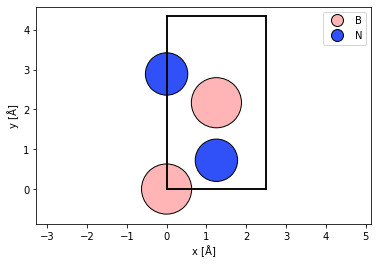

In [3]:
atoms = graphene(vacuum=3, a=2.504)

atoms[0].number = 5
atoms[1].number = 7

atoms = abtem.orthogonalize_cell(atoms)

atoms *= (1,1,1)

abtem.show_atoms(atoms, legend=True);

In [5]:
gpaw = GPAW(txt=None, kpts=(5, 5, 1), mode=PW(500))
atoms.calc = gpaw
atoms.get_potential_energy()
#gpaw.write("test.gpw")

-37.221073398751166

In [5]:
from gpaw import PW

#for i in range(1000):
#    gpaw = GPAW(mode=PW(500), txt=None, kpts=(5, 5, 1))
#    atoms.calc = gpaw
#    atoms.get_potential_energy()

In [5]:
abtem.GPAWPotential(gpaw, sampling=0.04).build().compute()

[########################################] | 100% Completed |  2.0s
